In [1]:
"""Treating weather ocean data"""
import pandas as pd
from datetime import date
from datetime import timedelta
from matplotlib import pyplot as plt

# yesterday = date.today() - timedelta(days = 1)
FN = 'weather-data-HEIGHT.json'

class HeightData():
    """Class that handles Wave Height Data"""
    
    def __init__(self,file_name) -> None:
        self.file_name = file_name
        self.yesterday = date.today() - timedelta(days = 1)
        self.one_month_ago = date.today() - timedelta(days = 30)

    def import_height(self):
        """Imports and cleans Data, returns dataframe"""
        df = pd.read_json(self.file_name,encoding='utf8',convert_dates=['SDATA'])
        df.set_index('SDATA',inplace=True)
        return df
    
    def yesterday_height(self):
        """Slices data for yesterday"""
        df = self.import_height()
        return (df[self.yesterday:]['HMAX'].max(),df[self.yesterday:]['HS'].max())
    
    def max_values(self):
        """Returns max values for Hs & Hmax and the respective dates"""
        df = self.import_height()
        max_hs = df['HS'].max()
        max_hs_date = df.index[df['HS'] == max_hs][0].strftime("%d %b, %Y")
        max_hmax = df['HMAX'].max()
        max_hmax_date = df.index[df['HMAX'] == max_hmax][0].strftime("%d %b, %Y")
        num_days = len(set(df.index.date))
        return f"Maximum Hs of {max_hs} ocurred at {max_hs_date} and maximum Hmax of {max_hmax} ocurred at {max_hmax_date}.\nWe have {num_days} day(s) of data!"

    def plot_date_rolling_30(self):
        """Plot on date"""
        df = self.import_height()
        df['Data'] = df.index.date
        grouped = df[self.one_month_ago:].groupby('Data').max()
        grouped.plot(kind="bar",title="Hs e Hmax para os ultimos dias!")
        # Bar labels here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
        plt.show()
        return grouped
    
    def table_data(self):
        """Table / DataFrame with all the data"""
        df = self.import_height()
        df['Data'] = df.index.date
        grouped = df.groupby('Data').max()
        return grouped

    def plot_histogram(self):
        """Plots histogram with all data for max Hs daily"""
        df = self.import_height()
        df['Data'] = df.index.date
        grouped = df.groupby('Data').max()['HS']
        grouped.plot(kind="hist",title="Histograma de valores máximos de Hs diários!")
        # Bar labels here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
        plt.show()
        return grouped

In [4]:
data = HeightData(FN)
df = data.import_height()
df.head()


,HMAX,HS
SDATA,,
2023-12-05 08:00:00,2.1,1.6
2023-12-05 09:00:00,2.2,1.5
2023-12-05 10:00:00,2.5,1.6
2023-12-05 11:00:00,2.2,1.5
2023-12-05 12:00:00,2.0,1.4


In [5]:
df['Data'] = df.index.date
grouped = df.groupby('Data').max()['HS']
# grouped.plot(kind="hist",title="Histograma de valores máximos de Hs diários!")
# Bar labels here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
# plt.show()

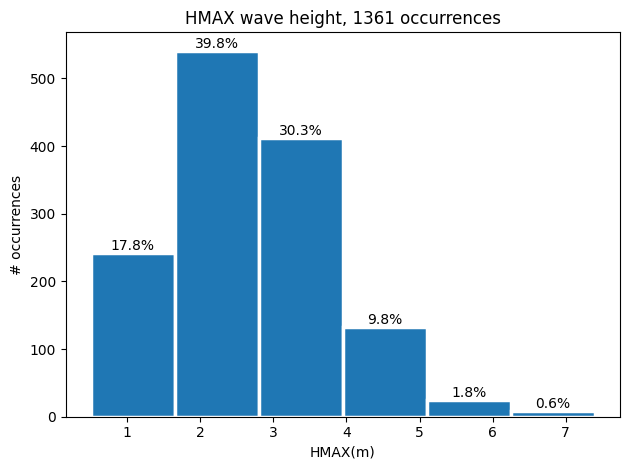

In [27]:
def plot_hist(parameter):
    fig, ax = plt.subplots(tight_layout=True)
    N, bins, patches = ax.hist(df[parameter], bins=6,linewidth=2.5, edgecolor="white")
    total_n = N.sum()
    weights = N * 100 / total_n
    ax.set(ylabel='# occurrences', xlabel=f'{parameter}(m)', title=f'{parameter} wave height, {int(total_n)} occurrences')
    for patch, label in zip(patches, weights): 
        height = patch.get_height() 
        ax.text(patch.get_x() + patch.get_width() / 2, height+0.01, "{}%".format(round(label,1)), 
                ha='center', va='bottom')
    plt.show()

plot_hist('HMAX')

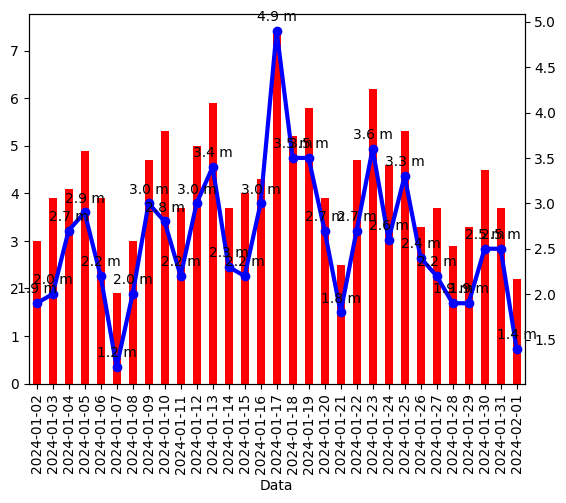

In [37]:
def plot_date_rolling_30():
    """Plot on date"""
    df['Data'] = df.index.date
    grouped = df[data.one_month_ago:].groupby('Data').max()
    # grouped.plot(kind="bar",title="Hs e Hmax para os ultimos dias!")
    # Bar labels here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

    ax1 = grouped['HMAX'].plot(kind='bar', color = 'red')


    ax2 = ax1.twinx()
    ax2.plot(ax1.get_xticks(),grouped['HS'],color='blue',linewidth=3,marker='o')
    line = ax2.lines[0]
    for x, y in zip(line.get_xdata(),line.get_ydata()):
        label = f"{round(y,1)} m"
        ax2.annotate(label,(x,y), xytext=(0,5),textcoords='offset points',ha='center',va='bottom')

    plt.show()

plot_date_rolling_30()